<a href="https://colab.research.google.com/github/r-matsuzaka/practice-elements-of-programming/blob/main/colab/chapter_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter13 Dynamic Programming

In [1]:
%%capture
!pip install yapf

from IPython.core.magic import register_cell_magic
from yapf.yapflib.yapf_api import FormatCode


@register_cell_magic
def fmt(line, cell):
   """
   My formatter cell magic comannd.
   Please install yapf before using this magic command.
   """
   print(FormatCode(cell, style_config='pep8')[0])

## Fibonacci number
- Recursion
- Dynamic programming

In [2]:
def fibonacci_dp(n, cache={}):
  if n <= 1:
    return n

  elif n not in cache:
    cache[n] = fibonacci_dp(n-1) + fibonacci_dp(n-2)
  return cache[n]

fibonacci_dp(10)

55

In [3]:
def fibonacci(n):
  if n <= 1:
    return n

  f_minus_2, f_minus_1 = 0, 1
  for _ in range(1, n):
    f = f_minus_2 + f_minus_1
    f_minus_2, f_minus_1 = f_minus_1, f
  return f_minus_1

fibonacci(10)

55

In [4]:
# %%fmt
import time
import math
import numpy as np
import matplotlib.pyplot as plt


def time_cost_viz(f, nmax):

    time_counts = []

    ids = list(range(nmax))
    start_time = time.perf_counter()

    for id in ids:
        start_time = time.perf_counter()
        f(id)
        end_time = time.perf_counter()
        elapsed_time = end_time - start_time
        time_counts.append(math.log10(elapsed_time))

    x = np.array(ids)
    y = np.array(time_counts)
    plt.plot(x, y)

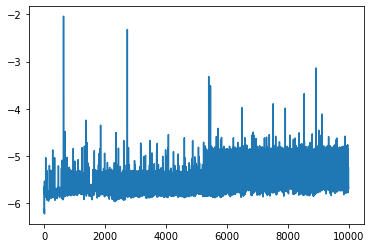

In [5]:
time_cost_viz(fibonacci_dp, 10000)

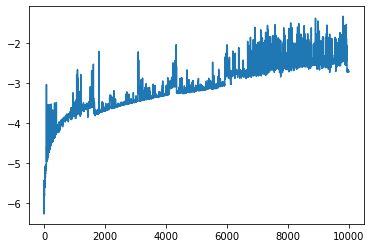

In [6]:
time_cost_viz(fibonacci, 10000)

## traveling salesman problem

- Dynamic programming
- Reinforcement learning
- Genetic algorithm
- Dijkstra's algorithm

In [7]:
%%capture
!pip install networkx 

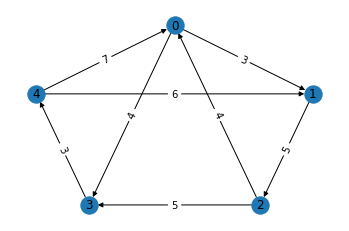

In [8]:
#%%fmt
import math
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

pos = {
    0: (0, 1),
    1: (math.cos(math.radians(18)), math.sin(math.radians(18))),
    2: (math.sin(math.radians(36)), -math.cos(math.radians(36))),
    3: (-math.sin(math.radians(36)), -math.cos(math.radians(36))),
    4: (-math.cos(math.radians(18)), math.sin(math.radians(18))),
}

# path = (start, end, cost)
paths = [(0, 1, 3), (2, 0, 4), (0, 3, 4), (4, 0, 7), (1, 2, 5), (4, 1, 6),
         (2, 3, 5), (3, 4, 3)]
G.add_weighted_edges_from(paths)

nx.draw_networkx_labels(G, pos)

# Draw only weight attribute as edge label.
edge_labels = {(i, j): w['weight'] for i, j, w in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Finish drawing.
nx.draw(G, pos)

# Display with Matplotlib.
plt.axis('off')
plt.show()

### Dijkstra's algorithm

In [9]:
%%time
nx.dijkstra_path(G, 0, 4)

CPU times: user 74 µs, sys: 3 µs, total: 77 µs
Wall time: 80.6 µs


[0, 3, 4]

### Bellman–Ford algorithm

In [10]:
%%capture
!pip install bellmanford
import bellmanford as bf

In [11]:
%%time
length, nodes, negative_cycle = bf.bellman_ford(G, source=0, target=4, weight='weight')
nodes

CPU times: user 175 µs, sys: 0 ns, total: 175 µs
Wall time: 181 µs


Reference
- [Elements of Programming Interviews](https://www.amazon.co.jp/Elements-Programming-Interviews-Python-Insiders-ebook/dp/B09QX36QZQ/ref=sr_1_1?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&crid=2HMROKFH0ZT5D&keywords=Elements+of+Programming+Interviews&qid=1649566675&s=digital-text&sprefix=elements+of+programming+interviews%2Cdigital-text%2C161&sr=1-1)
- [現場で使える！Python深層強化学習入門 強化学習と深層学習による探索と制御](https://www.amazon.co.jp/%E7%8F%BE%E5%A0%B4%E3%81%A7%E4%BD%BF%E3%81%88%E3%82%8B%EF%BC%81Python%E6%B7%B1%E5%B1%A4%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%E5%85%A5%E9%96%80-%E5%BC%B7%E5%8C%96%E5%AD%A6%E7%BF%92%E3%81%A8%E6%B7%B1%E5%B1%A4%E5%AD%A6%E7%BF%92%E3%81%AB%E3%82%88%E3%82%8B%E6%8E%A2%E7%B4%A2%E3%81%A8%E5%88%B6%E5%BE%A1-%E4%BC%8A%E8%97%A4-%E5%A4%9A%E4%B8%80-ebook/dp/B07SVMGBZN/ref=tmm_kin_swatch_0?_encoding=UTF8&qid=&sr=)
- [プログラミングコンテストチャレンジブック [第2版]　～問題解決のアルゴリズム活用力とコーディングテクニックを鍛える～](https://www.amazon.co.jp/%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%82%B3%E3%83%B3%E3%83%86%E3%82%B9%E3%83%88%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8%E3%83%96%E3%83%83%E3%82%AF-%E7%AC%AC2%E7%89%88-%EF%BD%9E%E5%95%8F%E9%A1%8C%E8%A7%A3%E6%B1%BA%E3%81%AE%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0%E6%B4%BB%E7%94%A8%E5%8A%9B%E3%81%A8%E3%82%B3%E3%83%BC%E3%83%87%E3%82%A3%E3%83%B3%E3%82%B0%E3%83%86%E3%82%AF%E3%83%8B%E3%83%83%E3%82%AF%E3%82%92%E9%8D%9B%E3%81%88%E3%82%8B%EF%BD%9E-%E7%A7%8B%E8%91%89-%E6%8B%93%E5%93%89-ebook/dp/B00CY9256C/ref=sr_1_1?__mk_ja_JP=%E3%82%AB%E3%82%BF%E3%82%AB%E3%83%8A&crid=26ZVZ2CRNQYWL&keywords=%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8%E3%83%96%E3%83%83%E3%82%AF&qid=1649566610&s=digital-text&sprefix=%E3%83%97%E3%83%AD%E3%82%B0%E3%83%A9%E3%83%9F%E3%83%B3%E3%82%B0%E3%83%81%E3%83%A3%E3%83%AC%E3%83%B3%E3%82%B8%E3%83%96%E3%83%83%E3%82%AF%2Cdigital-text%2C173&sr=1-1)
- [遺伝的アルゴリズム・巡回セールスマン問題](https://mukai-lab.info/pages/classes/artificial_intelligence/chapter11/)
- [Dijkstra 法による最短経路](https://showa-yojyo.github.io/notebook/python-networkx/practice.html#id5)
- [Bellman–Ford algorithm](https://github.com/nelsonuhan/bellmanford)